# Assignment-6

This notebook contains the questions to test the proficiency in `Statistics`.

### Date: 1st February, 2026

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-06-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-06-Dipika_Chopra.ipynb`.
- For numerical problems you can either solve the same using using python in the solution notebook or you can solve it on paper and upload the scan pdf copy of the solution. 
- If you are solving it on paper then name the pdf file of the scan copy of the solution as `Assignment-06-<your_name>_<your_surname>.pdf`. For example if your name is Akash Kumar then name the file as `Assignment-06-Akash_Kumar.pdf`.
- Upload the solved notebook in your github repo under the folder **Assignment-6**.
- Upload the solved notebook and the scanned pdf copy of the solutions in the google drive location: https://drive.google.com/drive/folders/1YcMNgD9h_Kdh7-Q0no3xONNctBtzqcOJ?usp=sharing 
<h3><span style="color:red"> Deadline: 22nd February, 2026 </span></h3>

<h5><span style="color:blue"> <b>Instructions:</b> Please answer all the questions. For problems requiring numerical solutions, you are encouraged to write code in Python to compute the results. Show your steps and explain your reasoning. </span></h5>

### Problem-1

A startup company with 20 employees recorded their annual salaries (in INR Lakhs):
`[6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9, 7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6]`

(a) Calculate the mean, median, and mode of the salaries.

(b) Determine the range, variance, and standard deviation of the salaries.

(c) Calculate the Interquartile Range (IQR). What does the IQR tell you about the salary distribution?

(d) Construct a box plot for the salaries. Identify any potential outliers.


In [10]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

#### (a) Calculate the mean, median, and mode of the salaries.

In [80]:
salaries = [6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9, 7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6]
salaries_arr = np.array(salaries, dtype=float)

print(f"Salary mean: {round(np.mean(salaries_arr), 2)}")
print(f"Salary Median: { round(np.median(salaries_arr), 2)}")
print(f"Salary Mode: {round(stat.mode(salaries_arr),2)}")


Salary mean: 8.19
Salary Median: 7.7
Salary Mode: 6.5


$$ range = max - min $$
$$ var(X) = \sigma^2 = \frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N} $$
$$ std(X) = \sqrt{var(X)}

#### (b) Determine the range, variance, and standard deviation of the salaries.

In [5]:
max_salary = salaries_arr.max()
min_salary = salaries_arr.min() 
salary_range = max_salary - min_salary

salary_variance = salaries_arr.var()
salary_std = salaries_arr.std()
print(f"Salary Range: {salary_range}")
print(f"Salary Variance: {round(salary_variance,4)}")
print(f"Salary Standard Deviation: {round(salary_std,4)}")


Salary Range: 8.5
Salary Variance: 3.4349
Salary Standard Deviation: 1.8533


#### (c) Calculate the Interquartile Range (IQR). What does the IQR tell you about the salary distribution?

In [6]:
def get_IQR(arr):
    Q1, Q2, Q3 = stat.quantiles(arr)
    return Q3 - Q1

def get_whiskers(arr):
    Q1, Q2, Q3 = stat.quantiles(arr)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    bottom_whisker = arr[arr >min_salary].min() if lower_bound> min_salary else min_salary

    upper_bound = Q3 + 1.5 * IQR
    top_whisker = arr[arr<max_salary].max() if upper_bound<max_salary else max_salary
    
    return (bottom_whisker, top_whisker)



In [8]:
IQR = get_IQR(salaries_arr)
print(f"IQR: {round(IQR, 2)}")

bw, tw = get_whiskers(salaries_arr)
print(f"Min Salary: {min_salary}, max salary : {max_salary}")


print(f"Bottom Whisker : {bw}, Top Whisker : {tw}")

IQR: 1.7
Min Salary: 6.5, max salary : 15.0
Bottom Whisker : 6.5, Top Whisker : 10.5


Here IQR is 1.7, that means the middle 50% of the data lies within the range of 1.7 units. IQR for above salaries is small, that means most of the data are tightly clustered around the median.
There is only one outlier - 15

##### (d) Construct a box plot for the salaries. Identify any potential outliers.

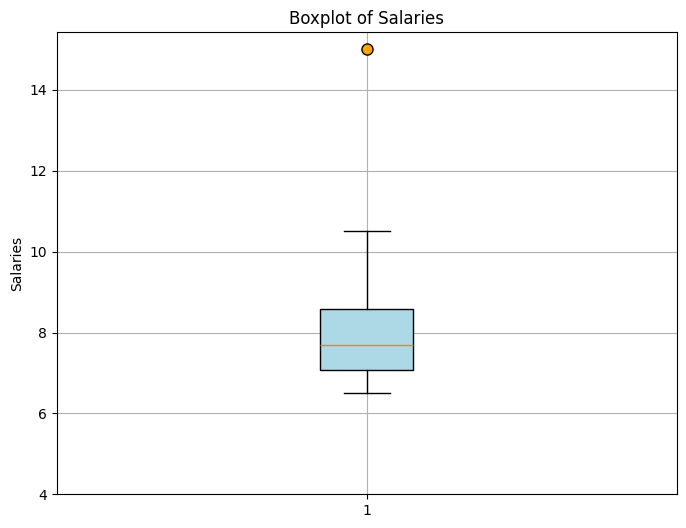

In [92]:
plt.figure(figsize=(8,6))
plt.boxplot(salaries_arr, 
            vert=True,
            patch_artist=True,
            boxprops=dict(facecolor="lightblue"), 
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=8))


plt.ylim(4)
plt.ylabel("Salaries")
plt.title("Boxplot of Salaries")
plt.grid()
plt.show()

The salary data is right skewed, 
- from the box plot median is closer to Q1
- longer right tail
- also mean > median

(array([4., 4., 2., 3., 2., 2., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 6.5  ,  6.925,  7.35 ,  7.775,  8.2  ,  8.625,  9.05 ,  9.475,
         9.9  , 10.325, 10.75 , 11.175, 11.6  , 12.025, 12.45 , 12.875,
        13.3  , 13.725, 14.15 , 14.575, 15.   ]),
 <BarContainer object of 20 artists>)

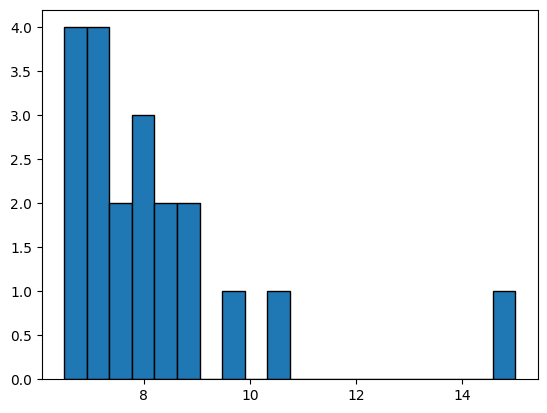

In [89]:
plt.hist(salaries_arr, bins = 20, edgecolor='k')

### Problem-2

A tech company conducted a customer satisfaction survey, rating their latest product on a scale of 1 to 10 (10 being highly satisfied). The scores from 30 randomly selected customers are:
[7, 8, 9, 6, 7, 8, 10, 5, 7, 8, 9, 7, 6, 8, 7, 9, 10, 6, 7, 8, 5, 9, 8, 7, 6, 7, 8, 9, 7, 8]

(a) Create a frequency distribution table for these scores.

(b) Plot a histogram of the customer satisfaction scores. Describe the shape of the distribution (e.g., symmetric, skewed).

(c) Calculate the Pearson's (first and second) coefficients of skewness for this data. Interpret the values.

(d) Calculate the excess kurtosis for this data using sample kurtosis formula. What does the kurtosis value suggest about the tails of the distribution?

In [76]:
ratings = np.array([7, 8, 9, 6, 7, 8, 10, 5, 7, 8, 9, 7, 6, 8, 7, 9, 10, 6, 7, 8, 5, 9, 8, 7, 6, 7, 8, 9, 7, 8])
ratings

array([ 7,  8,  9,  6,  7,  8, 10,  5,  7,  8,  9,  7,  6,  8,  7,  9, 10,
        6,  7,  8,  5,  9,  8,  7,  6,  7,  8,  9,  7,  8])

#### a) Create a frequency distribution table for these scores.

In [10]:
from collections import Counter

def frequency(data) -> dict:
    ratings_freq = Counter(data)
    return dict(ratings_freq)

In [ ]:

rating_freq = frequency(ratings).items()
pd.DataFrame(rating_freq, columns=["Rating", "Frequency"]).sort_values(by="Rating").reset_index(drop=True)

,Rating,Frequency
0,5,2
1,6,4
2,7,9
3,8,8
4,9,5
5,10,2


#### b) Plot a histogram of the customer satisfaction scores. Describe the shape of the distribution (e.g., symmetric, skewed).

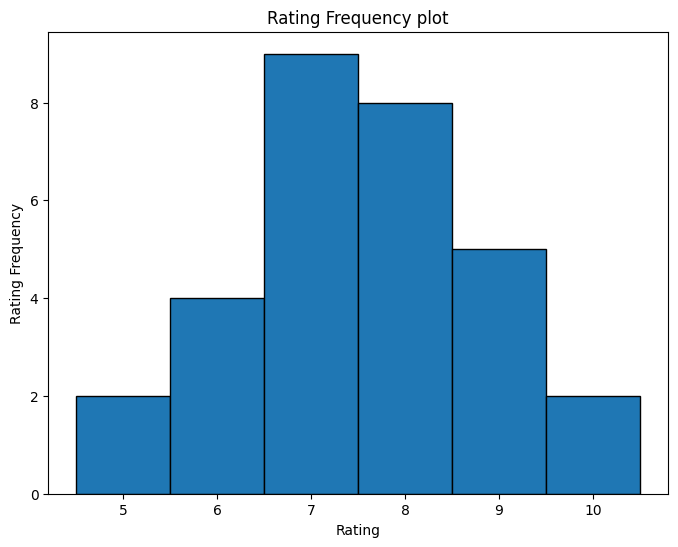

In [12]:

plt.figure(figsize=(8,6))
plt.hist(ratings, bins=np.arange(4.5, 10.6,1), edgecolor = 'k')
plt.xlabel("Rating")
plt.ylabel("Rating Frequency")
plt.title("Rating Frequency plot")
plt.show()

#### The plot is symmetric

np.float64(0.4153393053209319)

#### (c) Calculate the Pearson's (first and second) coefficients of skewness for this data. Interpret the values.

In [19]:
#(c) Calculate the Pearson's (first and second) coefficients of skewness for this data. Interpret the values.
ratings_mean = ratings.mean()
ratings_mode = stat.mode(ratings)
ratings_median = np.median(ratings)
ratings_std = ratings.std()

sk1 = (ratings_mean - ratings_mode)/ratings_std
sk2 = (3 * (ratings_mean - ratings_median))/ratings_std

print(f"Mean: {ratings_mean}, Mode: {ratings_mode}, Median: {ratings_median}, Standard Deviation: {ratings_std}")
print(f"Person's First Coefficient of Skewness: {round(sk1,4)}")
print(f"Person's Second Coefficient of Skewness: {round(sk2,4)}")

if -0.5 < sk1 < 0.5:
    print("The distribution is approximately symmetric")
elif -1.0 < sk1 < -0.5 or 0.5 < sk1 < 1:
    print("The distribution is moderately skewed")
elif 1 < sk1 < -1:
    print("Highly skewed")

Mean: 7.533333333333333, Mode: 7, Median: 7.5, Standard Deviation: 1.284090685617215
Person's First Coefficient of Skewness: 0.4153
Person's Second Coefficient of Skewness: 0.0779
The distribution is approximately symmetric


from pearson's second coefficient - though the value is positive but it is near 0, so from this it is evident that the distribution is approximately symmetrical

In [79]:
# Bowley's coefficient of skewness

import statistics as stat
Q1, Q2, Q3 = stat.quantiles(ratings)

sk_b = (Q1 + Q3 - 2*Q2)/(Q3 -Q1)
sk_b

np.float64(0.2)

##### (d) Calculate the excess kurtosis for this data using sample kurtosis formula. What does the kurtosis value suggest about the tails of the distribution?

In [ ]:
from scipy.stats import kurtosis

excess_kurtosis = kurtosis(ratings)

print(f"excess kurtosis: {excess_kurtosis}")

if excess_kurtosis > 0:
    print("The data has heavy tails. probability of outliers is high.") # leptokurtic
elif excess_kurtosis < 0:
    print("The data has light tails. probability of outliers is low.") # platykurtic
else:
    print("The data has medium tail: similar ro normal distribution") # mesokurtic


excess kurtosis: -0.5139892909816126
The data has light tails. probability of outliers is low.


### Problem-3

A marketing team wants to understand the relationship between their monthly advertising expenditure (in INR Lakhs) and corresponding sales revenue (in INR Lakhs) over the last 10 months.

| Month | Advertising Spend (X) | Sales Revenue (Y) |
|-------|-----------------------|-------------------|
|     1 |                     5 |                52 |
|     2 |                     7 |                65 |
|     3 |                     6 |                60 |
|     4 |                     8 |                70 |
|     5 |                     5 |                55 |
|     6 |                     9 |                75 |
|     7 |                     7 |                68 |
|     8 |                    10 |                80 |
|     9 |                     6 |                58 |
|    10 |                     8 |                72 |


(a) Calculate the covariance between advertising spend and sales revenue.

(b) Plot Sales Revenue vs Advertising spent.

(c) Calculate the Pearson correlation coefficient between advertising spend and sales revenue.

(d) Interpret the meaning of both the covariance and the correlation coefficient in the context of this data.

#### (a) Calculate the covariance between advertising spend and sales revenue.

In [36]:
import numpy as np
import pandas as pd


X = np.array([5, 7, 6, 8, 5, 9, 7, 10, 6, 8])           # advertising spent
Y = np.array([52, 65, 60, 70, 55, 75, 68, 80, 58,72])   # sales revenue

Z = np.linspace(1,10,10).astype(int) # month

data = np.column_stack((Z,X,Y))

df = pd.DataFrame(data, columns=['Month', 'Advertising Spend', 'Sales Revenue'])
df

,Month,Advertising Spend,Sales Revenue
0,1,5,52
1,2,7,65
2,3,6,60
3,4,8,70
4,5,5,55
5,6,9,75
6,7,7,68
7,8,10,80
8,9,6,58
9,10,8,72


In [67]:
def covariance(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    n = x.shape[0]
    cov = ((x - x_bar) @ (y - y_bar))/ (n - 1) # in numpy cov, it devides by (n-1) by defauld as it calculates sample variance

    return cov

In [46]:
print(f"Covariance between advertising spend and sales revenue {round(covariance(df["Advertising Spend"], df["Sales Revenue"]), 4)}")

Covariance between advertising spend and sales revenue 14.9444


In [39]:

np.cov(df["Advertising Spend"], df["Sales Revenue"]) # computes sampled variance, so it devides by (n-1)

array([[ 2.76666667, 14.94444444],
       [14.94444444, 83.16666667]])

#### (b) Plot Sales Revenue vs Advertising spent.

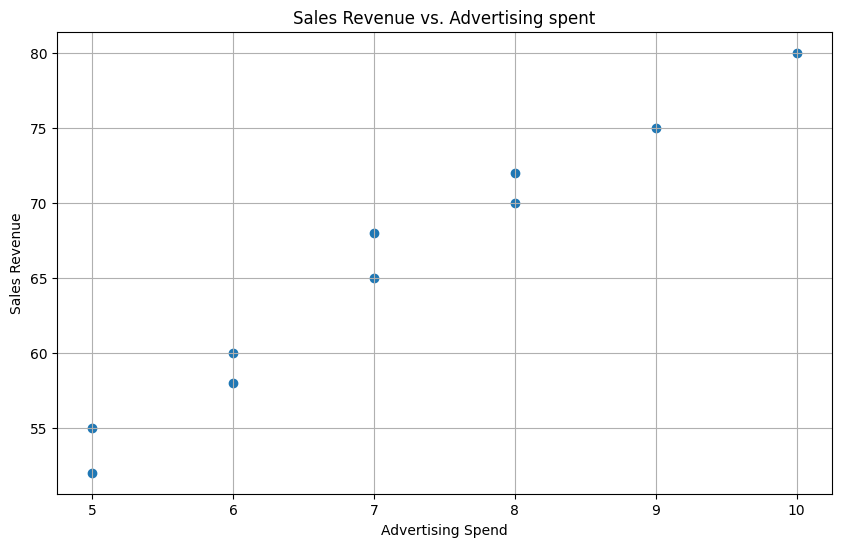

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df["Advertising Spend"], df["Sales Revenue"])
plt.title("Sales Revenue vs. Advertising spent")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales Revenue")
plt.grid()
plt.show()

#### (c) Calculate the Pearson correlation coefficient between advertising spend and sales revenue.

In [71]:
def correlation_coefficient(x,y):
    x_std = np.std(x, ddof=1) # as in covariance we are using sample covariance (n-1)
    y_std = np.std(y, ddof=1) # as in covariance we are using sample covariance (n-1)

    cor = covariance(x,y)/ (x_std * y_std)
    return cor


In [72]:
correlation_coefficient(df["Advertising Spend"], df["Sales Revenue"])

np.float64(0.9852052295662905)

In [73]:
np.corrcoef(df["Advertising Spend"], df["Sales Revenue"])

array([[1.        , 0.98520523],
       [0.98520523, 1.        ]])

#### (d) Interpret the meaning of both the covariance and the correlation coefficient in the context of this data.

- Covariance between advertising spend and sales revenue is 14.94 which is > 0, from this value we can conclude that there is __positive__ linear relationship between these 2 features.

- As correlation coefficient between advertising spend and sales revenue is positive and near 1, that means there is __strong__ positive relationship between these 2 features.

### Problem-4

A traffic department claims that the average daily commute time for residents in a certain city is 45 minutes. A researcher believes this claim is too low and collects data from a random sample of 100 residents. The sample mean commute time is 48 minutes with a standard deviation of 12 minutes.

(a) Formulate the null and alternative hypotheses for this scenario.

(b) Construct a 95% confidence interval for the true average daily commute time.

(c) Based on the confidence interval, what can you conclude about the traffic department's claim?


#### (a) Formulate the null and alternative hypotheses for this scenario.

$ H_0 = (\mu = 45) $ = Average daily commute time is 45 minutes

$ H_a = (\mu > 45) $ = Average daily commute time is not 45 minutes

#### (b) Construct a 95% confidence interval for the true average daily commute time.


$ \mu = 45 $

n=100

df = n-1 = 99

sample mean = $ \bar x =48 $

sample standard deviation = s = 12 

confidence level = 0.95

significance level = $ \alpha $ = 0.05

$ \alpha/2 $ = 0.025

from t-table, $ t_{n-1, \alpha/2} = t_{99,0.025} = 1.9847 $

confident interval $ \bar x $ &pm; $t_{n-1, \alpha/2} * \frac{s}{\sqrt{n}} $ = 48 &pm; 1.9847 * 1.2 = 48 &pm;2.38164

At 95% confidence level LCB = 45.61836 , UCB = 50.38164

#### (c) Based on the confidence interval, what can you conclude about the traffic department's claim?

Traffic department's claim is $ \mu =45 $
but from above evidence we can say that this value is not inside 95% confidence interval
We __reject__ the null hypothesis that "Average daily commute time is 45 minutes"
There is strong evidence that $\mu $ is above 45

### Problem-5

A manufacturing company wants to estimate the average number of units produced per hour by a new machine. They take 36 random observations and find the sample mean to be 150 units with a sample standard deviation of 15 units.

(a) What is the point estimate for the true average number of units produced per hour?

(b) Construct a 99% confidence interval for the true average number of units produced per hour.

(c) If the company wants to be 99% confident that their estimate is within 3 units of the true mean, what sample size would they need (assuming the same standard deviation)?

#### (a) What is the point estimate for the true average number of units produced per hour?

Point Estimate = sample mean = 150

#### (b) Construct a 99% confidence interval for the true average number of units produced per hour.

number of sample = n = 36

sample mean = $ \bar x $ = 150

sample standard deviation = s = 15

standard error = SE = $ \frac {s}{\sqrt{n}} = 15/6  $

confidence level = 0.99

significance $ \alpha = 0.01 $

$ \alpha /2 = 0.005 $

from t-table, $ t_{n-1, \alpha/2} = t_{35, 0.005} = 2.724 $

confidence interval = 150 &pm; 2.724 * 15/6 = 150 &pm; 6.81

__Confidence Interval__ : LCB = 143.19 , UCB = 156.81



#### (c) If the company wants to be 99% confident that their estimate is within 3 units of the true mean, what sample size would they need (assuming the same standard deviation)?

for 99% confidence level margin of error  = 3

using z table:

$ z_\frac{\alpha}{2} * \frac{s}{\sqrt{n}}  = 3 $

$ z_{0.005} * \frac{15}{\sqrt{n}} = 3 $

$ n = (\frac {(2.58 * 15)}{3})^2 $

$ n = 166.41 $

So the required sample size is 167

### Problem-6

A website designer believes that a new website redesign will increase the average time users spend on the site. Before the redesign, the average time spent was 3.5 minutes. After the redesign, a random sample of 50 users showed an average time of 3.8 minutes with a standard deviation of 1.0 minute.

(a) Perform a one-sided hypothesis test at a 0.05 significance level to determine if the redesign significantly increased the average time spent.

(b) State your null and alternative hypotheses, calculate the test statistic, and determine the p-value.

(c) What is your conclusion regarding the website redesign's impact?

Step1:

__Null Hypothesis__ : $H_0 =$ After redesign there is no significant change in the average time $(\mu = 3.5) $

__Alternate Hypothesis__ $:H_a =$ After redesign there is significant change in the average time, it increased to 3.8 minutes $(\mu >
 3.5) $

Step 2:
Significant level = $ \alpha = 0.05 $

Step3: Samples mean = $ \bar x = 3.8 $, 
        Sample Standard deviation = s = 1, 
        Sample Size = n = 50

Step 4: t-statistics 
        $ t = \frac{3.8 - 3.5}{\frac{1}{\sqrt(50)}} = 2.121$

for one sided test critical value from t-table is $(\alpha = .05, dof = 49) $ = (2.011+2.009)/2  = 2.01

So t-value (2.121) > critical value (2.01), so we reject the null hypothesis. 

alternatively p value = 0.019503 which is less than significance level(0.05). That means we reject the null hypothesis.

__Conclusion__: So the website designer can be confident that the redesign increased the average time spent on the wensite.



### Problem-7

A company implemented a new training program to improve employee productivity. To assess its effectiveness, 15 employees' productivity scores were recorded before and after the training program. The scores are as follows:

| Employee | Before Training | After Training |
|----------|-----------------|----------------|
|        1 |              65 |             70 |
|        2 |              70 |             72 |
|        3 |              60 |             68 |
|        4 |              75 |             73 |
|        5 |              80 |             85 |
|        6 |              68 |             70 |
|        7 |              72 |             75 |
|        8 |              62 |             65 |
|        9 |              78 |             80 |
|       10 |              70 |             72 |
|       11 |              66 |             69 |
|       12 |              73 |             76 |
|       13 |              64 |             67 |
|       14 |              71 |             74 |
|       15 |              69 |             71 |

(a) State the null and alternative hypotheses to test if the training program significantly improved productivity.

(b) Conduct a paired samples t-test at a 0.05 significance level. Calculate the test statistic and the p-value.

(c) Based on your analysis, did the training program effectively improve employee productivity?

In [14]:
import numpy as np
import pandas as pd


before_training = [65,70,60,75,80,67,72,62,78,70,66,73,64,71,69]
after_training = [70,72,68,73,85,70,75,65,80,72,69,76,67,74,71]
data = np.column_stack((before_training, after_training))
df = pd.DataFrame(data, columns=["Before Training", "After Training"])
df["Difference(D)"] = df["After Training"] - df["Before Training"]
df

,Before Training,After Training,Difference(D)
0,65,70,5
1,70,72,2
2,60,68,8
3,75,73,-2
4,80,85,5
5,67,70,3
6,72,75,3
7,62,65,3
8,78,80,2
9,70,72,2


In [22]:
df["Difference(D)"].mean()

np.float64(3.0)

In [23]:
df["Difference(D)"].std()

np.float64(2.104417123236605)

Step1:

__Null Hypothesis__ : $H_0 =$ After training there is no significant change in the productivity $(\mu_D = 0) $

__Alternate Hypothesis__ $:H_a =$ After training there is significant improvement in the productivity $(\mu_D >
 0) $

This is one sided test

Step 2:
Significant level = $ \alpha = 0.05 $

Step3: Samples mean = $ \bar D = 3.0 $, 
        Sample Standard deviation = s = 2.104, 
        Sample Size = n = 15

Step 4: t-statistics 
        $ t = \frac{3.0 - 0}{\frac{2.104}{\sqrt(15)}} = 5.522$

for one sided test critical value from t-table is $(\alpha = .05, dof = 14) $ = 1.761

So t-value (5.522) > critical value (1.761), so we reject the null hypothesis. 

alternatively p value = 0.000038 which is less than significance level(0.05). That means we reject the null hypothesis.

__Conclusion__: So there is strong evidence that new training program significantly improved employee productivity. 

### Problem-8

A battery manufacturer claims that their new 'ProLife' battery lasts longer than their existing 'Standard' battery. A consumer watchdog organization tests 40 'ProLife' batteries and 50 'Standard' batteries. The results are:

ProLife: Sample mean life = 120 hours, Sample standard deviation = 10 hours

Standard: Sample mean life = 115 hours, Sample standard deviation = 12 hours

(a) State the null and alternative hypotheses for testing the manufacturer's claim.

(b) Perform a t-test for two independent means at a 0.02 significance level.

(c) What is your conclusion regarding the manufacturer's claim about the 'ProLife' battery?

Step1:

__Null Hypothesis__ : $H_0 =$ There is no significant difference in the battery life for 'ProLife and 'Standard' battery $(\mu_p - \mu_s = 0) $

__Alternate Hypothesis__ $:H_a =$ The battery life for 'ProLife is more than 'Standard' battery  $(\mu_p -
 \mu_s > 0) $

 Step2:
 Significance level = 0.02

Here population variance is not same for each sample, so we are doing Welch's t-test.
This is one sided test 

In [89]:
import math 
from scipy.stats import t

n1, mean1, s1 = 40, 120, 10 
n2, mean2, s2 = 50, 115, 12
alpha = 0.02

t_value = (mean1 -  mean2)/ math.sqrt(s1 ** 2/n1 + s2 ** 2/n2)
dof =   ((s1 ** 2/ n1 + s2 ** 2/n2) **2)/(((s1**2/n1)**2)/(n1 - 1) + (((s2 ** 2 / n2) **2) / (n2-1)))

print(f"t-value: {t_value}, dof:{dof}")

critical_value = t.ppf(1 - alpha, dof)
print(f"Critical Value: {critical_value}")

if t_value > critical_value:
    print("Reject the null hypothesis")
    print("There is significance evidence at 2% confidence level that pro life batter lasts longer than standard battery")
else:
    print("Fail to reject the null hypothesis")

print("\nUsing p-value")

p_value = 1 - t.cdf(t_value, dof)
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is significance evidence at 2% confidence level that pro life batter lasts longer than standard battery")
else:
    print("Fail to reject the null hypothesis")



t-value: 2.1556530677961345, dof:87.8354340166509
Critical Value: 2.084696810177459
Reject the null hypothesis
There is significance evidence at 2% confidence level that pro life batter lasts longer than standard battery

Using p-value
p-value: 0.01692266085894678
Reject the null hypothesis
There is significance evidence at 2% confidence level that pro life batter lasts longer than standard battery


### Problem-9

A popular restaurant chain claims that the average waiting time for a table on weekends is no more than 20 minutes. A local food critic believes it's longer. They record the waiting times (in minutes) for 30 randomly selected tables on various weekends:

`[22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26]`

(a) Calculate the sample mean and sample standard deviation of the waiting times.

(b) Conduct a one-sided t-test at a 0.01 significance level to assess the food critic's belief.

(c) State your null and alternative hypotheses, calculate the test statistic, and determine the critical value.

(d) Based on your findings, what can you tell the food critic?

In [37]:
import numpy as np

wait_time = np.array([22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26])
sample_mean = wait_time.mean()
sample_std = wait_time.std(ddof=1)
mu = 20
n = len(wait_time)
print(f"Sample Size: {n}, Sample Mean: {round(sample_mean, 2)}, Sample Satndard Deviation: {round(sample_std,2)}")

Sample Size: 30, Sample Mean: 24.37, Sample Satndard Deviation: 3.93


Hypothesis:

Null Hypothesis = H0 = Average waiting time in the restaurant is no more than 20 minutes ($ \mu $ &le; 20 )

Alternate Hypothesis = Ha = Average waiting time in the restaurant is more than 20 minutes ($ \mu $ &gt; 20)

significance level = 0.01

It's One sided test

test: Its one sample t-test

In [64]:
from scipy.stats import ttest_1samp, t

alpha = 0.01

t_test_object = ttest_1samp(wait_time, popmean=mu)
ttest_statistic = t_test_object.statistic
p_value = t_test_object.pvalue
dof = t_test_object.df

print(f"t={ttest_statistic}")
print(f"p-value={p_value}")
print(f"dof={dof}")

critical_value = t.ppf(1- alpha, dof)
print(f"critical_value: {critical_value}")

print("\nConclusion:")
if ttest_statistic > critical_value:
    print("Reject the null hypothesis")
    print("There is strong evidence that average waiting time in the restaurant is more than 2o minutes")
else:
    print("Fail to reject the null hypothesis")



t=6.0921711999214265
p-value=1.2372871347018504e-06
dof=29
critical_value: 2.4620213601503833

Conclusion:
Reject the null hypothesis
There is strong evidence that average waiting time in the restaurant is more than 2o minutes


### Problem-10

A software company is launching a new application and offers three different subscription tiers (Basic, Premium, Elite), each with varying features. Before the full launch, they conduct a pilot study to see if there's an association between a customer's age group and their preferred subscription tier. They surveyed 300 randomly selected potential customers and recorded their age group and preferred tier:

| Age Group   | Basic | Premium | Elite | Total |
|-------------|-------|---------|-------|-------|
| 18-29 years |    45 |      60 | 15    | 120   |
| 30-49 years |    30 |      50 | 20    | 100   |
|   50+ years |    25 |      40 | 15    | 80    |
|       Total |   100 |     150 | 50    | 300   |


(a) State the null and alternative hypotheses for the test of independence in this context.

(b) Calculate the expected frequencies for each cell in the table, assuming the null hypothesis is true. Show your calculations clearly.

(c) Calculate the chi-square test statistic.

(d) Using a significance level of α=0.05, determine the critical value for this test.

(e) What is your conclusion? Is there a significant association between a customer's age group and their preferred subscription tier? Justify your answer based on your calculated chi-square statistic and the critical value.

__H0 = There is no association between a customer's age group and their preferred subscription tier.__

__Ha = There is association between a customer's age group and their preferred subscription tier.__

$ E_{row,col} = \frac{Row Total * Column Total}{Grand Total} $

Frequency_table:

| Age Group   | Basic    | Premium | Elite    | 
|-------------|-------   |---------|-------   |
| 18-29 years |    40    |      60 | 20       |
| 30-49 years |    33.33 |      50 | 16.66    | 
|   50+ years |    26.66 |      40 | 13.33    | 
|       Total |   100    |     150 | 50       | 

Chi-square test statistics:

| Age Group   | Basic                        | Premium           | Elite                    |
|-------------|------------------------------|-------------------|--------------------------|
| 18-29 years |   $ (45-40)^2/40 $           |      $ (60-60)^2/60 $ | $ (15-20)^2/20 $       |
| 30-49 years |   $ (30- 33.33)^2/33.33 $    |     $ (50-50)^2/50 $. | $ (20-16.66)^2/16.66 $ |
| 50+ years.  |   $ (25-26.66)^2/26.66  $    |   $(40 - 40)^2/40 $   | $ (15-13.33)^2/13.33 $|

Computed values of $ \frac{(O-E)^2} {E} $

| Age Group   | Basic    | Premium | Elite    | 
|-------------|-------------|---------|------- |
| 18-29 years |    0.625    |      0 | 1.25     |
| 30-49 years |    0.3327   |      0 | 0.669    |
|   50+ years |    0.1033   |      0 | 0.2092   |

$ X^2 = .625+.3327+.1033+0+0+0+1.25 +.669+.2092 = 3.1892 $


Degrees of Freedom = (3-1) * (3-1) = 4

for df 4 and significance level 0.05, from chi distribution table:

critical value = 9.488

As calculated $ X^2 $ is less than critical value so we fail to reject the null hypothesis.

There is strong evidence that there is no association between a customer's age group and their preferred subscription tier.

In [94]:
import pandas as pd
import numpy as np

basic = np.array([45, 30, 25])
premium = np.array([60,50,40])
elite = np.array([15,20,15])

data = np.column_stack((basic, premium, elite))
survey = pd.DataFrame(data=data, columns=["Basic", "Premium", "Elite"], index=["18-29 years", "30-49 years","50+ years"])
survey


,Basic,Premium,Elite
18-29 years,45,60,15
30-49 years,30,50,20
50+ years,25,40,15


In [116]:
from scipy.stats import chi2_contingency, t

alpha = 0.05
chi_contingency_result = chi2_contingency(survey)

chi_statistics = chi_contingency_result.statistic
p_value = chi_contingency_result.pvalue
dof = chi_contingency_result.dof

print(f"chi_statistics: {chi_statistics}, p_value: {p_value}, dof: {dof}")
print(f"expected_freq:\n {chi_contingency_result.expected_freq}")

critical_value = t.ppf(alpha, dof)

print()
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is association between a customer's age group and their preferred subscription tier.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no association between a customer's age group and their preferred subscription tier.")


chi_statistics: 3.1875, p_value: 0.5269522746367854, dof: 4
expected_freq:
 [[40.         60.         20.        ]
 [33.33333333 50.         16.66666667]
 [26.66666667 40.         13.33333333]]

Fail to reject the null hypothesis
There is no association between a customer's age group and their preferred subscription tier.


### Bonus Problem

An e-commerce company is testing two different designs for its product pages (Design A and Design B) to see if one leads to significantly higher conversion rates (percentage of visitors who make a purchase). They randomly assigned 50,000 website visitors to see Design A and another 50,000 visitors to see Design B over a two-week period. At the end of the period, they collected data on the conversion rates. Due to data collection specifics, they have daily average conversion rates for 30 randomly selected days for each design, rather than individual visitor data.

Here are the summary statistics for the daily average conversion rates (in percentage points):

* Design A (Sample 1):

    - Number of days ($n_A$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_A$) = 2.85%
    - Sample Standard Deviation ($s_A$) = 0.45%

* Design B (Sample 2):

    - Number of days ($n_B$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_B$) = 3.05%
    - Sample Standard Deviation ($s_B$) = 0.60%

The company is concerned that the variability in conversion rates might differ between the two designs due to different aesthetic elements or backend processes.

(a) State the null and alternative hypotheses to test if there is a significant difference in the average daily conversion rates between Design A and Design B. (Consider a two-tailed test, as they are looking for any significant difference).

(b) Before performing the t-test, you need to decide whether to assume equal or unequal population variances. For the purpose of this problem, assume that a prior test suggests equal population variances.

(c) Calculate the appropriate test statistic (t-value) for comparing the two independent means, assuming equal population variances. Show all steps of your calculation.

(d) Determine the degrees of freedom for this test. 

(e) Using a significance level of α=0.05, determine the critical value(s) for your test.

(f) Based on your calculated test statistic and the critical value(s), what is your conclusion? Is there a statistically significant difference in the average daily conversion rates between Design A and Design B?

(g) Construct a 95% confidence interval for the difference between the true mean daily conversion rates $(μ_B - μ_A)$. Interpret this interval in the context of the problem.

(h) Show all the steps when a prior test suggests unequal population variances.

__Null Hypothesis__: H0: There is no significant difference in the daily conversion rates between Design A and Design B. $ (\mu = 0) $

__Alternative Hypothesis__: Ha:  There is significant difference in the daily conversion rates between Design A and Design B. $ (\mu $ &ne; 0) 

This problem satisfies t-test for independent means(pooled variance) and it is 2 tailed test

significance level = 0.05

Sample meand and standard deviation for A and B are given.

pooled  standard deviation:

$ s_p = \sqrt{\frac{(n_b-1)* s_b^2 + (n_a-1) * s_a^2}{n_b+n_a - 2}} = \sqrt{(((29* 0.6 ^ 2) + (29 * 0.45 ^ 2)) / (60-2))} = 0.5303$

$ t = \frac{(\bar x_b - \bar x_a) - (\mu_b - \mu_a)}{s_p * \sqrt{\frac{1}{n_b} + \frac{1}{n_a}}} = 1.4606 $

critical value for significance level 0.05 and degrees of freedom $ (n_1 + n_2 -2) $ = 58 : $ \pm 2.0017 $

t-value (1.46) < critical value (2.001) "fail to reject the null hypothesis"

__Conclusion__ : at 5% dignificance level, there is no significant difference in average daily conversion rates between Design A and Design B




(g)

Here we are estimating the true population mean differnce using sampling theory

Standard Error (SE) = $ s_p * \sqrt {(\frac{1}{n_1} + \frac{1}{n_2})} = 0.5303 * \sqrt{(\frac{1}{30} + \frac{1}{30})} = 0.1369 $

$ t = \frac{(\bar x_b - \bar x_a) - (\mu_b - \mu_a)}{s_p * \sqrt{\frac{1}{n_b} + \frac{1}{n_a}}} $

so $ (\mu_b - \mu_a) = t_{critical} * SE \pm ((\bar x_b - \bar x_a)) $

CI = $ (\bar x_b - \bar x_a)  \pm SE * t = 0.20 \pm 0.1369 * 1.4606 = 0.20 \pm 0.274 $

CI = (- 0.074, 0.474)

__Conclusion__: at 95% confidence interval, the difference between the true mean daily conversion rates $(μ_B - μ_A) $ lies between (- 0.074, 0.474)


(h)

for unequal population variance we will use welch's t-test


In [14]:
from scipy.stats import ttest_ind_from_stats

alpha = 0.05

ttest_ind_from_stats_obj= ttest_ind_from_stats(
                            mean1=3.05, std1=0.60, nobs1=30, 
                            mean2=2.85, std2=0.45, nobs2=30, 
                            equal_var=False)

t_value, p_value = ttest_ind_from_stats_obj.statistic, ttest_ind_from_stats_obj.pvalue
print(f"t_value: {t_value}, p_value: {p_value}")

if p_value < alpha: # ttest_ind_from_stats returns 2 tailed p-value
    print("Reject the null hypothesis")
    print("There is significant difference in the daily conversion rates between Design A and Design B")
else:
    print("Fail to reject the null hypothesis")
    print("At 5% dignificance level, there is no significant difference in average daily conversion rates between Design A and Design B")


t_value: 1.4605934866804409, p_value: 0.1499445263094936
Fail to reject the null hypothesis
At 5% dignificance level, there is no significant difference in average daily conversion rates between Design A and Design B
